# Time Series Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [2]:
stock = 'BLK'
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2020,4,9)
blk_close = yf.download(stock,start=start,end = end, interval='1d')['Close']

[*********************100%***********************]  1 of 1 downloaded


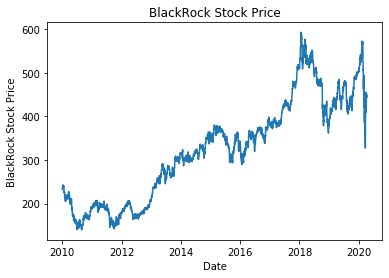

In [3]:
plt.plot(blk_close)
plt.title('BlackRock Stock Price')
plt.ylabel('BlackRock Stock Price')
plt.xlabel('Date')
plt.show()

As we can observe, there is a real trend in Apple's stock price. Specifically, in 2010, it has a value under $\$50$ and, towards the beginning of 2020, it hit $250. Thus, it is not stationary.

Another way of detecting the non-stationarity is to apply `Autocorrelation Function`. Autocorrelation implies serial dependence. Precisely, it occurs when a time series is highly correlated with its lagged version. It is shown by acf plot. The more height of the bar in the acf plot, the more dependence a series has.

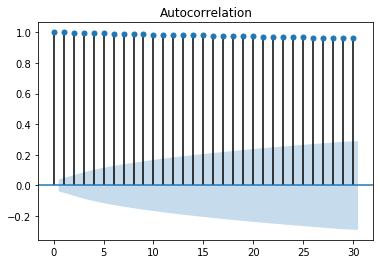

In [4]:
sm.graphics.tsa.plot_acf(blk_close,lags=30)
plt.show()

The `acf` plot indicates that acf is slowly decaying, which is an indicator of non-stationarity. 

Let's see what happens when the first difference of the stock price is taken. `.diff()` function takes the first difference in Python.

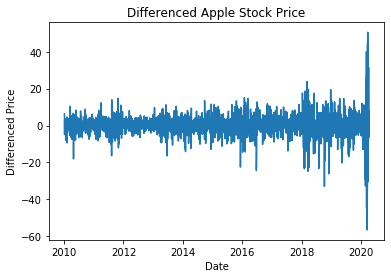

In [5]:
plt.plot(blk_close.diff())
plt.title('Differenced Apple Stock Price')
plt.ylabel('Differenced Price')
plt.xlabel('Date')
plt.show()

Another method for detecting stationarity is the statistical test and one of the most common one is `augmented dickey fuller` test.

$H_0 :\theta = 0$

$H_1 :\theta < 0$

In [ ]:
from statsmodels.tsa.stattools import adfuller

stat_test=adfuller(blk_close)[0:2]
print("The test statistic and p-value of ADF test are {}".format(stat_test))

After taking the first difference, it is quite obvious that the series fluctuates around its mean and it is referred to as weakly stationary.

## 1.2. Random Walk

Random walk is basically a process in which series fluctuates around its mean. Differently, a random walk is a process by which randomly-moving objects wander away from where they started. If we have zero intercept term, the simple random walk model is what we have:

\begin{equation}x_t=x_{t-1}+e_t\end{equation}

So, the path of $x_t$ is determined by $x_{t-1}$ and $e_t$ which is completely random.

Let's generate random number from standard normal distribution via `.randn()`. Standard normal distribution is a special version of normal distribution with a mean of 0 and a standard deviation of 1. Let's generate 100 normally distributed data:

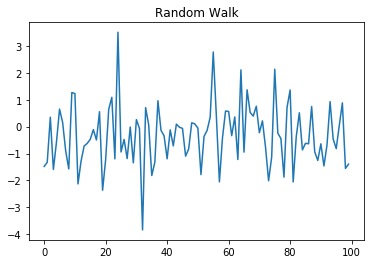

In [6]:
random_walk=np.random.randn(100)

plt.plot(random_walk)
plt.title('Random Walk')
plt.show()

## 1.3. Time Series Models

After briefly visiting the theory of time series, it is time to discuss the main time series models, which are:

    * Moving Average
    * Autoregressive Model
    * Autoregressive Moving Average
    * Autoregressive Integrated Moving Average
    * Seasonal Autoregressive Integrated Moving Average


In [7]:
diff_blk_close=blk_close.diff().dropna()

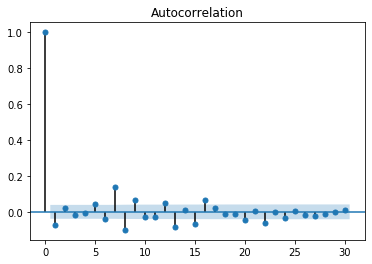

In [8]:
sm.graphics.tsa.plot_acf(diff_blk_close,lags=30)
plt.show()

ACF plot for `BlackRock` stock price indicates a pattern typical for situations where an MA(8) model may be useful. There are three statistically significant “spikes” at lags 1,7 and 8 followed by non-significant values for other lags.

### 1.3.2. Autoregressive Model

`Autoregressive model` (AR) is one of the most basic models in time series. As its name suggest, we regress the current value of a series over its lagged values. So, it is based on the idea that current values of series $x_t$ can be accounted for as a function of past values.

Different lag values can be employed to explain the current value of $x_t$. Symbolically, AR(p) denotes that $x_t$ is explained by p past values of $x_t$.

For the sake of simplicity, AR(1) model can be represented by the following equation:

\begin{equation} X_{t} = \alpha + \beta X_{t-1} + \epsilon \end{equation}

In order to model AR in python, we use `AutoReg` library. But the question is can we define the optimal lag number? To do that we have two different ways to follow:
* Partial Autocorrelation Function
* Akaike Information Criteria

Partial Autocorrelation Function (PACF) is another method to examine the relationship between ${X_t}$ and ${X_{t-p}}, p\in \mathbb{Z}$. ACF is considered as a useful tool in MA(q) model sumply beacuse it lets us define the cut-off point for optimal lag. ACF is, however, not working well with AR(p) process.

PACF provides information on correlation between current value of a time series and its lagged values controlling for the other correlations. Mathematically,

\begin{equation}
\hat \rho(h)= \frac{\text{Cov}(X_t,X_{t-h}|X_{t-1},X_{t-2}\ldots X_{t-h-1})}{\sqrt{\text{Var}(X_t|X_{t-1},X_{t-2},\ldots, X_{t-h-1})\text{Var}(X_{t-h}|X_{t-1},X_{t-2},\ldots, X_{t-h-1})}}
\end{equation}

But the question is how do we know that the optimal lag number is 1? We cannot know that without further analysis. This analysis is called `Akaike Information Criteria (AIC)`.

`AIC` is used to detect the best-fitting model. Mathematically speaking, 

\begin{equation}
AIC=-2ln(\text{Maximum Likelihood})+2d
\end{equation}



where d is the total number of parameters. The last term, 2d in the equation aims at reducing the risk of overfitting. It is also called as `penalty term` by which I can filter out the unnecessary redundancy in the model.

Let's decide the best-fitting AR model with AIC using `PACF`.

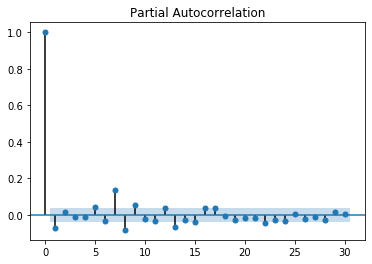

In [11]:
sm.graphics.tsa.plot_pacf(diff_blk_close,lags=30)
plt.show()

The PACF shows some spikes at lag 1 and 6, which can be interpreted to mean that a six-order autoregression may be warranted since there are notable partial autocorrelations for lags 1 and six. 

In [12]:
from statsmodels.tsa.ar_model import AutoReg

In [13]:
ar_blk = AutoReg(diff_blk_close, lags=8)
ar_fitted_blk = ar_blk.fit()

In [14]:
ar_predictions_blk= ar_fitted_blk.predict(start=len(diff_blk_close[:-50]), 
                                   end=len(diff_blk_close[:-50])+len(diff_blk_close[-50:])-1,dynamic=False)

In [15]:
for i in range(len(ar_predictions_blk)):
    print('=='*25)
    print('predicted values:{:.4f} & actual values:{:.4f}' .format(ar_predictions_blk[i],diff_blk_close[-50:][i]))

predicted values:-0.2652 & actual values:6.5200
predicted values:-0.8682 & actual values:3.2000
predicted values:1.2531 & actual values:-12.3400
predicted values:0.2663 & actual values:2.7300
predicted values:-0.8026 & actual values:5.1600
predicted values:-1.2690 & actual values:8.2400
predicted values:1.6895 & actual values:11.1900
predicted values:-0.7265 & actual values:1.0700
predicted values:0.2869 & actual values:5.3600
predicted values:-2.1696 & actual values:9.3400
predicted values:1.1703 & actual values:2.0400
predicted values:0.6691 & actual values:-3.9300
predicted values:0.5685 & actual values:-2.6100
predicted values:1.0453 & actual values:-1.1300
predicted values:-0.4684 & actual values:7.2600
predicted values:0.2150 & actual values:-5.1500
predicted values:1.0235 & actual values:-9.9200
predicted values:-0.0549 & actual values:-29.0000
predicted values:0.8091 & actual values:-22.0000
predicted values:1.4118 & actual values:2.4700
predicted values:-0.1782 & actual values

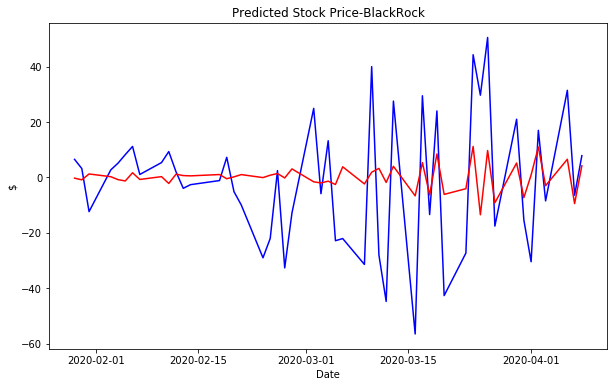

In [16]:
plt.figure(figsize=(10,6))
plt.plot(diff_blk_close[-50:], label='Actual Stock Price',c='b')
plt.plot(ar_predictions_blk,c='r')
plt.title('Predicted Stock Price-BlackRock')
plt.xlabel('Date')
plt.ylabel('$')
plt.show()

The above-given plot shows how AR predicts. The blue line indicates the closing price of Apple and the red line represents the prediction based on AR and it turns out the prediction performance is not that good.

### 1.3.3. Autoregressive Moving Average

Thus far, we have, first, tried to model a series by regressing current value of it on its past values , which is referred to as AR model. Then, error terms are taken into account to model a series, which is called MA. How about combining these two? 

Here we have a model called `ARMA` combining both autoregressive and moving average components. So, we have 2 parameters to define: order of AR component p and order of MA component q.

The ARMA model takes the following form when p and q is 1:

\begin{equation} X_{t} = \alpha + \beta_{1} X_{t-1} + \beta_{2} \epsilon_{t-1} + \epsilon_{t} \end{equation}

Let's make some practice and we need to find the optimal number of lags.

In [17]:
from statsmodels.tsa.arima_model import ARMA
import itertools
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [18]:
p=q=range(0,6)
pq=list(itertools.product(p,q))
arma_results_blk=[]
for param_set in pq:
    try:
        arma_blk=ARMA(diff_blk_close.values,order=param_set)
        arma_fitted_blk = arma_blk.fit()
        arma_results_blk.append(arma_fitted_blk.aic)
        print('=='*25)
        print('ARMA parameters are:{} & AIC value is:{}'.format(param_set,  arma_fitted_blk.aic))
    except:
        continue
print('**'*25)
print('The Lowest AIC score is {:.4f} and the corresponding parameters are {}'.format(pd.DataFrame(arma_results_blk).where(pd.DataFrame(arma_results_blk).T.notnull().all()).min()[0],pq[arma_results_blk.index(min(arma_results_blk))]))

ARMA parameters are:(0, 0) & AIC value is:16401.87361845525
ARMA parameters are:(0, 1) & AIC value is:16391.088967160398
ARMA parameters are:(0, 2) & AIC value is:16392.081679232746
ARMA parameters are:(0, 3) & AIC value is:16393.292517945803
ARMA parameters are:(0, 4) & AIC value is:16395.284507677276
ARMA parameters are:(0, 5) & AIC value is:16394.048953222064
ARMA parameters are:(1, 0) & AIC value is:16390.62061183803
ARMA parameters are:(1, 1) & AIC value is:16391.798359808785
ARMA parameters are:(1, 2) & AIC value is:16385.783361985403
ARMA parameters are:(1, 3) & AIC value is:16382.461448805574
ARMA parameters are:(1, 4) & AIC value is:16377.592153753765
ARMA parameters are:(1, 5) & AIC value is:16371.981350639206
ARMA parameters are:(2, 0) & AIC value is:16391.893818476485
ARMA parameters are:(2, 1) & AIC value is:16383.753927934522
ARMA parameters are:(2, 2) & AIC value is:16318.712274369453
ARMA parameters are:(2, 3) & AIC value is:16319.776836789584
ARMA parameters are:(2, 4)

In [19]:
arma_blk = ARMA(diff_blk_close,order=(4, 4))
arma_fitted_blk= arma_blk.fit()

In [20]:
arma_predictions_blk= arma_fitted_blk.predict(start=len(diff_blk_close[:-50]), 
                                   end=len(diff_blk_close[:-50])+len(diff_blk_close[-50:])-1,dynamic=False)

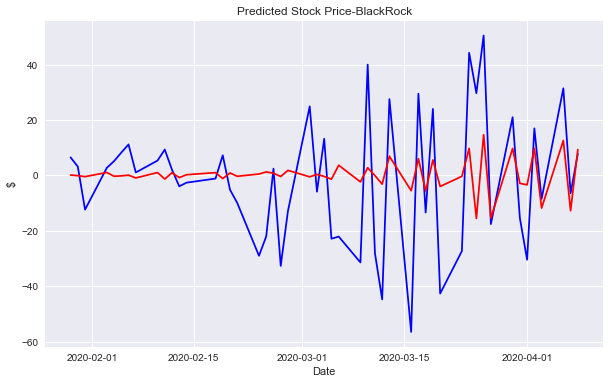

In [21]:
plt.figure(figsize=(10,6))
plt.plot(diff_blk_close[-50:], label='Actual Stock Price',c='b')
plt.plot(arma_predictions_blk,c='r')
plt.title('Predicted Stock Price-BlackRock')
plt.xlabel('Date')
plt.ylabel('$')
plt.show()

### 1.3.4. Autoregressive Integrated Moving Average

As we discuss the stationary assumption should be satisfied in modeling a time series. In the presence of non-stationarity, first difference needs to be taken before running AR, MA, and ARMA. However, it is not the case for `Autoregressive Integrated Moving Average`(ARIMA) in that we have `Integrated` term. So, before running ARIMA, all we need to do specify the degree of difference along with two other parameters borrowed from ARMA(p,q). In a nutshell, ARIMA(p,d,q) has three parameters and one of is for making a series stationary.

The first and third parameters of ARIMA is coming from AR and MA components, respectively and as we can guess the second parameter represents the order of difference.

To use ARIMA, we again use `statsmodels` but now import `ARIMA` library:

In [22]:
from statsmodels.tsa.arima_model import ARIMA

In [23]:
p=q=range(0,6)
d=range(0,3)
pdq=list(itertools.product(p,d,q))
arima_results_blk=[]
for param_set in pdq:
    try:
        arima_blk=ARIMA(blk_close, order=param_set)
        arima_fitted_blk = arima_blk.fit()
        arima_results_blk.append(arima_fitted_blk.aic)
        print('=='*25)
        print('ARIMA parameters are:{} & AIC value is:{}'.format(param_set,  arima_fitted_blk.aic))
    except:
        continue
print('**'*25)
print('The Lowest AIC score is {:.4f} and the corresponding parameters are {}'.format(pd.DataFrame(arima_results_blk).where(pd.DataFrame(arima_results_blk).T.notnull().all()).min()[0],pdq[arima_results_blk.index(min(arima_results_blk))]))

ARIMA parameters are:(0, 0, 0) & AIC value is:31872.20430545216
ARIMA parameters are:(0, 0, 1) & AIC value is:28439.66916739333
ARIMA parameters are:(0, 0, 2) & AIC value is:25806.893500225786
ARIMA parameters are:(0, 0, 3) & AIC value is:23699.840571237728
ARIMA parameters are:(0, 0, 4) & AIC value is:22501.327799924176
ARIMA parameters are:(0, 0, 5) & AIC value is:21228.381658527207
ARIMA parameters are:(0, 1, 0) & AIC value is:16401.87361845525
ARIMA parameters are:(0, 1, 1) & AIC value is:16391.088967160398
ARIMA parameters are:(0, 1, 2) & AIC value is:16392.081679232746
ARIMA parameters are:(0, 1, 3) & AIC value is:16393.292517945803
ARIMA parameters are:(0, 1, 4) & AIC value is:16395.284507677276
ARIMA parameters are:(0, 1, 5) & AIC value is:16394.048953222064
ARIMA parameters are:(0, 2, 0) & AIC value is:18363.902907292257
ARIMA parameters are:(0, 2, 1) & AIC value is:16406.342179944077
ARIMA parameters are:(0, 2, 2) & AIC value is:16395.699451416007
ARIMA parameters are:(0, 2, 

ARIMA parameters are:(3, 2, 5) & AIC value is:16319.025561315146
ARIMA parameters are:(4, 0, 0) & AIC value is:16406.922217694548
ARIMA parameters are:(4, 0, 1) & AIC value is:16392.062604839248
ARIMA parameters are:(4, 0, 2) & AIC value is:16333.460364096081
ARIMA parameters are:(4, 0, 3) & AIC value is:16330.901976804751
ARIMA parameters are:(4, 0, 4) & AIC value is:16327.608885795666
ARIMA parameters are:(4, 0, 5) & AIC value is:16326.993947630242
ARIMA parameters are:(4, 1, 0) & AIC value is:16395.171533826895
ARIMA parameters are:(4, 1, 1) & AIC value is:16369.647156491377
ARIMA parameters are:(4, 1, 2) & AIC value is:16314.498652503626
ARIMA parameters are:(4, 1, 3) & AIC value is:16317.588361025752
ARIMA parameters are:(4, 1, 4) & AIC value is:16305.472542860942
ARIMA parameters are:(4, 2, 0) & AIC value is:16836.81179071104
ARIMA parameters are:(4, 2, 1) & AIC value is:16399.792497921117
ARIMA parameters are:(4, 2, 2) & AIC value is:16374.308072492819
ARIMA parameters are:(4, 2

In [24]:
arima_blk = ARIMA(blk_close,order=(4,1,4))
arima_fitted_blk = arima_blk.fit()

In [25]:
arima_predictions_blk= arima_fitted_blk.predict(start=len(blk_close[:-50]), 
                                   end=len(blk_close[:-50])+len(blk_close[-50:])-1,dynamic=False)

In [26]:
arima_predictions_blk=pd.DataFrame(arima_predictions_blk)
arima_predictions_blk.index=blk_close[-50:].index

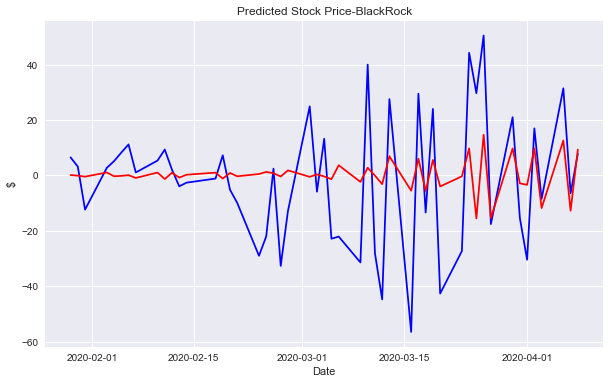

In [27]:
plt.figure(figsize=(10,6))
plt.plot(diff_blk_close[-50:], label='Actual Stock Price',c='b')
plt.plot(arima_predictions_blk,c='r')
plt.title('Predicted Stock Price-BlackRock')
plt.xlabel('Date')
plt.ylabel('$')
plt.show()

### 1.3.5. SARIMA

In [28]:
blk_monthly_close = yf.download(stock,start=start,end = end, interval='1mo')['Close'].dropna()

[*********************100%***********************]  1 of 1 downloaded


In [29]:
from pmdarima.arima import auto_arima

In [30]:
auto_arima_fitted_blk=auto_arima(blk_monthly_close,d=1,D=1,m=12,error_action='ignore',suppress_warnings=True,
                            stepwise=True,seasonal=True,n_jobs=-1,random_state=20,random=True)

In [31]:
auto_arima_fitted_blk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  124
Model:             SARIMAX(3, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -508.490
Date:                              Mon, 05 Oct 2020   AIC                           1034.981
Time:                                      10:43:00   BIC                           1059.367
Sample:                                           0   HQIC                          1044.873
                                              - 124                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6437      2.666      0.241      0.809      -4.582       5.870
ar.L1         -0.4745      0.138     -3.431      0.001      -0.746      -0.203
ar.L2         -0.8804      0.158     -5.586      0.000      -1.189      -0.572
ar.L3         -0.1045      0.125     -0.838      0.402      -0.349       0.140
ma.L1          0.3127      0.189      1.656      0.098      -0.057       0.683
ma.L2          0.9978      1.143      0.873      0.383      -1.242       3.237
ar.S.L12      -0.3367      0.136     -2.470      0.014      -0.604      -0.070
ma.S.L12      -0.5536      0.146     -3.780      0.000      -0.841      -0.267
sigma2       495.3197    549.534      0.901      0.367    -581.748    1572.387
===================================================================================
Ljung-Box (Q):                       21.81   Jarque-Bera (JB):                19.31
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               4.79   Skew:                            -0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
prediction_sarima_blk=auto_arima_fitted_blk.predict(n_periods=50)

In [33]:
prediction_sarima_blk=pd.DataFrame(prediction_sarima_blk)
prediction_sarima_blk.index=diff_blk_close[-50:].index

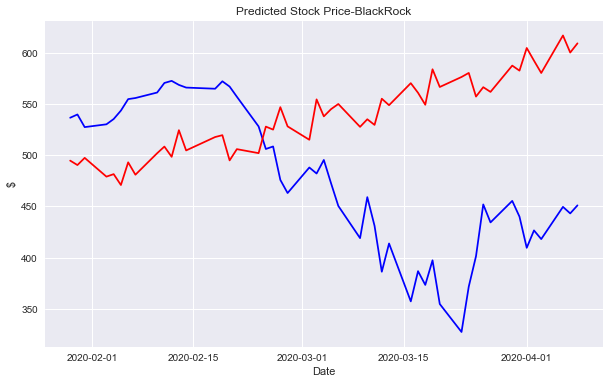

In [34]:
plt.figure(figsize=(10,6))
plt.plot(blk_close[-50:], label='Actual Stock Price',c='b')
plt.plot(prediction_sarima_blk,c='r')
plt.title('Predicted Stock Price-BlackRock')
plt.xlabel('Date')
plt.ylabel('$')
plt.show()

---

# Conclusion

This lesson covers some of the fundamental ways a financial analyst can deal with time. We cover some theory about processes and a concept called randomness. Then we cover some ways to transform our current tool set, particularly linear modeling, to handle time. Lastly, we introduce the classic model for time series analyses such as AR, MA, ARMA, ARIMA, and SARIMA.